<a href="https://colab.research.google.com/github/victordsrocha/Atlantico-Academy-NLP/blob/main/Introducao_NLP_AtlanticoAcademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# fonte do dataset: https://www.kaggle.com/jannesklaas/disasters-on-social-media
questions = pd.read_csv('socialmedia-disaster-tweets-DFE.csv',  encoding ='ISO-8859-1')
questions = questions[['text', 'choose_one']]

# dados sujos
questions.head()

,text,choose_one
0,Just happened a terrible car crash,Relevant
1,Our Deeds are the Reason of this #earthquake M...,Relevant
2,"Heard about #earthquake is different cities, s...",Relevant
3,"there is a forest fire at spot pond, geese are...",Relevant
4,Forest fire near La Ronge Sask. Canada,Relevant


In [ ]:
# Expressões regulares para limpeza dos dados
def standardize_text(df, text_field):
  df[text_field] = df[text_field].str.replace(r"http\S+", "")
  df[text_field] = df[text_field].str.replace(r"http", "")
  df[text_field] = df[text_field].str.replace(r"@\S+", "")
  df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
  df[text_field] = df[text_field].str.replace(r"@", "at")
  df[text_field] = df[text_field].str.lower()
  return df

# Limpeza e regravação do arquivo de saída limpo
clean_questions = standardize_text(questions, 'text')
clean_questions.to_csv('clean_data.csv')
clean_questions.head()

,text,choose_one
0,just happened a terrible car crash,Relevant
1,our deeds are the reason of this earthquake m...,Relevant
2,"heard about earthquake is different cities, s...",Relevant
3,"there is a forest fire at spot pond, geese are...",Relevant
4,forest fire near la ronge sask canada,Relevant


In [ ]:
# Distribuição das classes
clean_questions.groupby('choose_one').count()

,text
choose_one,
Can't Decide,16
Not Relevant,6187
Relevant,4673


In [ ]:
from nltk.tokenize import RegexpTokenizer

# Método de quebra dos dados
tokenizer = RegexpTokenizer(r'\w+')

# Gerando listas de sentenças quebradas
clean_questions['tokens'] = clean_questions['text'].apply(tokenizer.tokenize)

#Primeiras linhas
clean_questions.head()

,text,choose_one,tokens
0,just happened a terrible car crash,Relevant,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this earthquake m...,Relevant,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about earthquake is different cities, s...",Relevant,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask canada,Relevant,"[forest, fire, near, la, ronge, sask, canada]"


In [ ]:
#Inspecionando novamente os dados
all_words = [word for tokens in clean_questions['tokens'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions['tokens']]
VOCAB = sorted(list(set(all_words)))


print('Quantidade total de palavras: {}'.format(len(all_words)))
print('Quantidade total de palavras únicas: {}'.format(len(VOCAB)))
print('Maior sentença encontrada: {} tokens'.format(max(sentence_lengths)))

Quantidade total de palavras: 154703
Quantidade total de palavras únicas: 18097
Maior sentença encontrada: 34 tokens


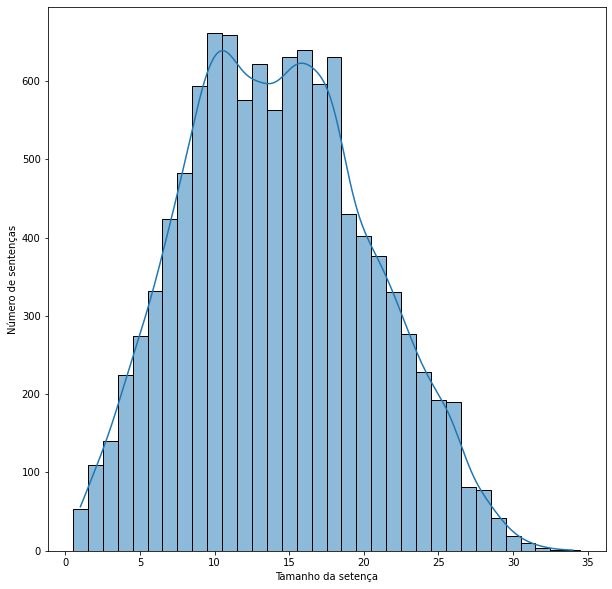

In [ ]:
#Distribuição das sentenças por quantidade de palavras
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 10))
plt.xlabel('Tamanho da setença')
plt.ylabel('Número de sentenças')
sns.histplot(data=sentence_lengths, kde=True, discrete=True);